# [**Démonstration des différentes stratégies de KBinsDiscretizer**](https://nbviewer.org/github/Franck-PepperLabs/pepper_data-science_practising/blob/main/Sklearn/examples/6_3_preprocessing/plot_discretization_strategies.ipynb)<br/>([_Demonstrating the different strategies of KBinsDiscretizer_](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_strategies.html))

Cet exemple présente les différentes stratégies implémentées dans [**`KBinsDiscretizer`**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html) :

- `'uniform'` : La discrétisation est uniforme dans chaque caractéristique, ce qui signifie que la largeur des intervalles est constante dans chaque dimension.
- `'quantile'` : La discrétisation est effectuée sur les valeurs quantiles, ce qui signifie que chaque intervalle contient approximativement le même nombre d'échantillons.
- `'kmeans'` : La discrétisation est basée sur les centroïdes d'une procédure de regroupement KMeans.

Le graphique montre les régions où l'encodage discrétisé est constant.

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_discretization_strategies_001.png)

c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\franc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.


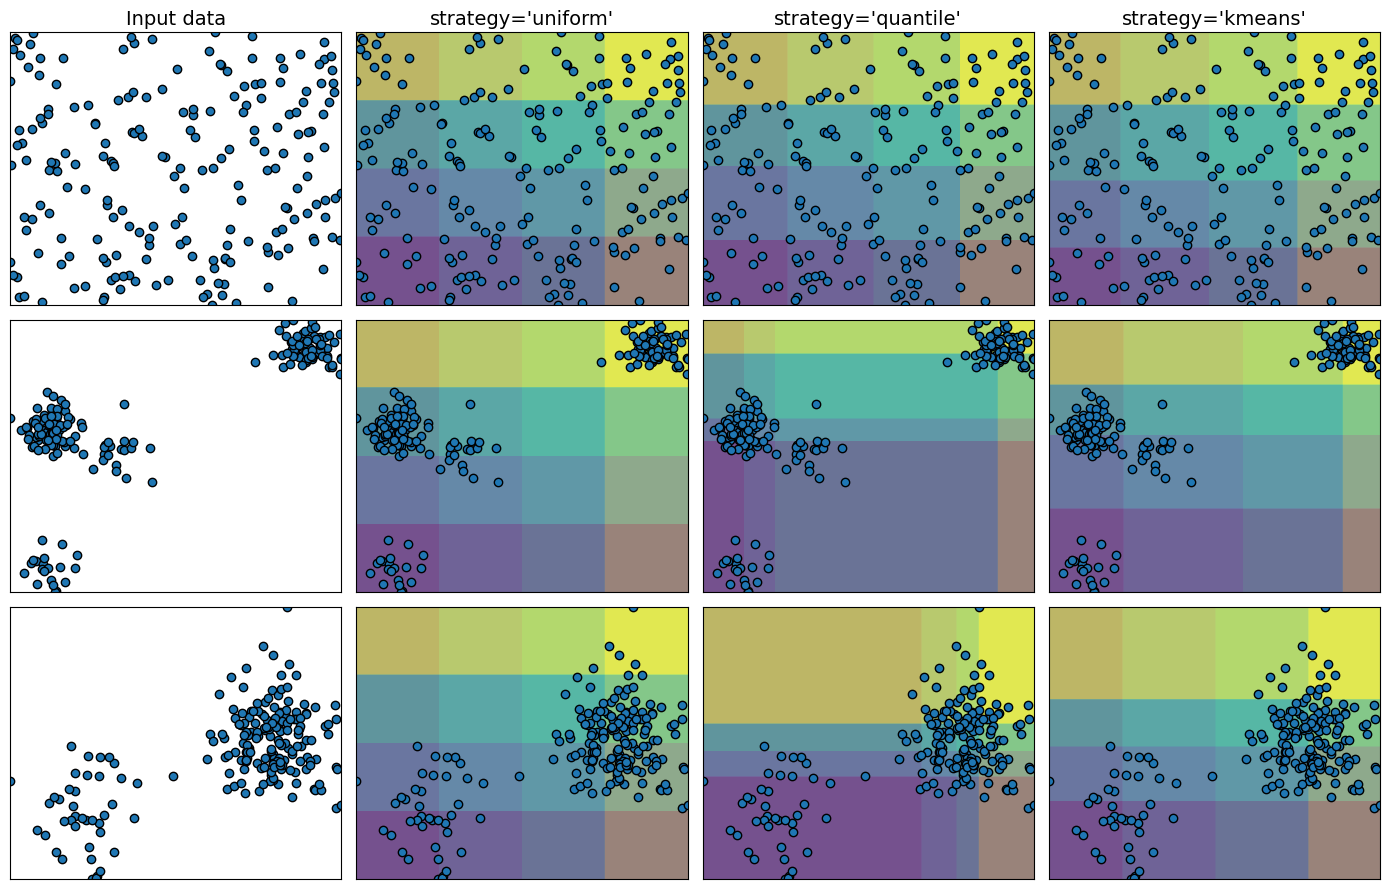

In [1]:
# Author: Tom Dupré la Tour
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.preprocessing import KBinsDiscretizer

strategies = ["uniform", "quantile", "kmeans"]

n_samples = 200
centers_0 = np.array([[0, 0], [0, 5], [2, 4], [8, 8]])
centers_1 = np.array([[0, 0], [3, 1]])

# construct the datasets
random_state = 42
X_list = [
    np.random.RandomState(random_state).uniform(-3, 3, size=(n_samples, 2)),
    make_blobs(
        n_samples=[
            n_samples // 10,
            n_samples * 4 // 10,
            n_samples // 10,
            n_samples * 4 // 10,
        ],
        cluster_std=0.5,
        centers=centers_0,
        random_state=random_state,
    )[0],
    make_blobs(
        n_samples=[n_samples // 5, n_samples * 4 // 5],
        cluster_std=0.5,
        centers=centers_1,
        random_state=random_state,
    )[0],
]

figure = plt.figure(figsize=(14, 9))
i = 1
for ds_cnt, X in enumerate(X_list):
    ax = plt.subplot(len(X_list), len(strategies) + 1, i)
    ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
    if ds_cnt == 0:
        ax.set_title("Input data", size=14)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min(), X[:, 0].max(), 300),
        np.linspace(X[:, 1].min(), X[:, 1].max(), 300),
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())

    i += 1
    # transform the dataset with KBinsDiscretizer
    for strategy in strategies:
        enc = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy=strategy)
        enc.fit(X)
        grid_encoded = enc.transform(grid)

        ax = plt.subplot(len(X_list), len(strategies) + 1, i)

        # horizontal stripes
        horizontal = grid_encoded[:, 0].reshape(xx.shape)
        ax.contourf(xx, yy, horizontal, alpha=0.5)
        # vertical stripes
        vertical = grid_encoded[:, 1].reshape(xx.shape)
        ax.contourf(xx, yy, vertical, alpha=0.5)

        ax.scatter(X[:, 0], X[:, 1], edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(f"strategy='{strategy}'", size=14)

        i += 1

plt.tight_layout()
plt.show()